In [1]:
import pandas as pd

# Specify the file path
file_path = 'C:\\Users\\tanxe\\Programming\\ML\\WORK\\classifier\\data.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)
df = df.drop(columns=['source_id', 'author', 'published_at', 'url_to_image', 'url' ])
filtered_df = df
filtered_df['relevant'] = filtered_df['category'].apply(lambda x: 1 if x == 'Stock' or x == 'Finance' else 0)
df_cleaned = filtered_df.dropna(subset=['content'])
balanced_df = df_cleaned
balanced_df

# filtered_df = df[df['source_name'].isin(['GlobeNewswire', 'The Times of India'])]

# filtered_df['relevant'] = filtered_df['category'].apply(lambda x: 1 if x == 'COVID' else 0)
# df_cleaned = filtered_df.dropna(subset=['full_content'])
# df_relevant_zero = df_cleaned[df_cleaned['relevant'] == 0]
# df_relevant_one = df_cleaned[df_cleaned['relevant'] == 1]
# df_sampled = df_relevant_zero.sample(n=1400, random_state=42)
# balanced_df = pd.concat([df_sampled, df_relevant_one], ignore_index=True)

,article_id,source_name,title,description,content,category,full_content,relevant
0,89541,International Business Times,UN Chief Urges World To 'Stop The Madness' Of ...,UN Secretary-General Antonio Guterres urged th...,UN Secretary-General Antonio Guterres urged th...,Nepal,UN Secretary-General Antonio Guterres urged th...,0
1,89542,Prtimes.jp,RANDEBOOよりワンランク上の大人っぽさが漂うニットとベストが新登場。,[株式会社Ainer]\nRANDEBOO（ランデブー）では2023年7月18日(火)より公...,"RANDEBOO2023718()WEB2023 Autumn Winter \n""Nepa...",Nepal,NaN,0
2,89543,VOA News,UN Chief Urges World to 'Stop the Madness' of ...,UN Secretary-General Antonio Guterres urged th...,"Kathmandu, Nepal UN Secretary-General Antonio...",Nepal,NaN,0
3,89545,The Indian Express,Sikkim warning: Hydroelectricity push must be ...,Ecologists caution against the adverse effects...,At least 14 persons lost their lives and more ...,Nepal,At least 14 persons lost their lives and more ...,0
4,89547,The Times of Israel,"200 foreigners, dual nationals cut down in Ham...","France lost 35 citizens, Thailand 33, US 31, U...","Scores of foreign citizens were killed, taken ...",Nepal,NaN,0
...,...,...,...,...,...,...,...,...
105370,781108,The Indian Express,"Have done no wrong, only did party work, says ...",The High Court today allowed Shivakumar to wit...,Karnataka Deputy Chief Minister D K Shivakumar...,Home,Karnataka Deputy Chief Minister D K Shivakumar...,0
105371,781129,Forbes,FC Barcelona Guarantees $77.6 Million Champion...,FC Barcelona have guaranteed at least $77.6 mi...,FC Barcelona have guaranteed at least $767.6 m...,Home,FC Barcelona have guaranteed at least $767.6 m...,0
105372,781235,NPR,Three hospitals ignored her gravely ill fiancé...,"Forty years ago, Sarah Lubarsky came home from...",The photo from David and Sarah Lubarsky's wedd...,Home,The photo from David and Sarah Lubarsky's wedd...,0
105373,781240,Forbes,Kerber’s Farm: Bringing Farm To Table To Manha...,"A farmstand in Long Island, Kerber’s Farms has...",Kerbers Farm: Bringing Farm To Table To Manhat...,Home,Kerber’s Farm: Bringing Farm To Table To Manha...,0


In [2]:
balanced_df_24k = balanced_df[balanced_df['source_name'].isin(["ETF Daily News", "The Times of India"])]
balanced_df_24k['relevant'] = balanced_df_24k['category'].apply(lambda x: 1 if x == 'Stock' else 0)
balanced_df_24k = balanced_df_24k.dropna(subset=['content'])
balanced_df_24k['relevant'].value_counts()

C:\Users\tanxe\AppData\Local\Temp\ipykernel_12716\2424080986.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  balanced_df_24k['relevant'] = balanced_df_24k['category'].apply(lambda x: 1 if x == 'Stock' else 0)


relevant
0    20757
1     3503
Name: count, dtype: int64

In [3]:
# make sure to download the right version for office gpu
# %pip uninstall spacy
# %pip install cupy-cuda117
# %pip install spacy[cuda117]


In [4]:
balanced_df_24k[balanced_df_24k['relevant'] == 1]

,article_id,source_name,title,description,content,category,full_content,relevant
3109,94343,The Times of India,These 9 commodity stocks hit 52-week high on T...,"During Thursday's trading session, the Sensex ...","Nov 02, 2023, 07:22:41 PM IST\nDuring Thursday...",Stock,NaN,1
57910,133924,The Times of India,Fundamental Radar: Varun Beverages poised to b...,Varun Beverages Ltd is the second-largest fran...,SynopsisVarun Beverages Ltd is the second-larg...,Stock,NaN,1
57935,134021,The Times of India,Stock market update: Mining stocks up as marke...,The 30-share BSE Sensex was up 425.32 points...,NEW DELHI: Mining stocks were trading higher o...,Stock,Getty Images Nifty moved in a tight range of 8...,1
57936,134022,The Times of India,Stock market update: Fertilisers stocks up as ...,The 30-share BSE Sensex was up 441.31 points...,NEW DELHI: Fertilisers stocks were trading hig...,Stock,Getty Images NEW DELHI: Fertilisers stocks wer...,1
57937,134023,The Times of India,InterGlobe stock price up 0.08 per cent as Sen...,"As of 30-Sep-2023, promoters held 38.02 per ce...",Shares of InterGlobe Aviation Ltd. rose 0.08 p...,Stock,"Reuters On an immediate basis, 15,770/52,500 a...",1
...,...,...,...,...,...,...,...,...
102076,693939,ETF Daily News,Universal (NYSE:UVV) vs. British American Toba...,Universal (NYSE:UVV – Get Free Report) and Bri...,Universal (NYSE:UVV – Get Free Report) and Bri...,Stock,Universal (NYSE:UVV–Get Free Report) and Briti...,1
102077,693944,The Times of India,Do we have enough retail money in debt markets?,"​​For example, as per the monthly data release...","Generally, the retail investors are late to th...",Stock,IANS INSIGHTS \n \t Rea...,1
102078,693947,The Times of India,"FII action, OPEC+ meet among top 10 factors to...",Meena expects the market to experience some di...,Indian frontline indices S&amp;P BSE Sensex an...,Stock,ETMarkets.com Indian frontline indices S&P BSE...,1
102079,693954,The Times of India,"For workers at this iPhone plant, Tata means a...","At the Narasapura facility, the recent takeove...","It is the Tata tag we aim for, who doesnt want...",Stock,"“It is the Tata tag we aim for, who doesn’t ...",1


Incorporating NER

In [5]:
import spacy

In [6]:
# !python -m spacy download en_core_web_lg

In [9]:
text = balanced_df['content'][0]
nlp = spacy.load('en_core_web_lg')
# nlp = spacy.load('en_core_web_trf') may be better in office

c:\Users\tanxe\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\datapoints\__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
c:\Users\tanxe\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\transforms\v2\__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedba

In [ ]:
text = balanced_df['full_content'][0]
nlp = spacy.load('en_core_web_lg')

In [ ]:
doc = nlp(text)
for ent in doc.ents:
    print(ent, ent.label_)

UN ORG
Antonio Guterres PERSON
Monday DATE
Himalayan NORP
Guterres PERSON
Everest LOC
Nepal GPE
nearly a third CARDINAL
just over three decades DATE
Himalayas LOC
Nepal GPE
65 percent PERCENT
the last decade DATE
Guterres PERSON
four-day DATE
Nepal GPE
Himalayan NORP
Hindu NORP
around 240 million CARDINAL
1.65 billion CARDINAL
South Asian NORP
Southeast Asian NORP
10 CARDINAL
Ganges NORP
Indus GPE
Yellow GPE
Mekong GPE
Irrawaddy GPE
billions CARDINAL
today DATE
Guterres PERSON
Syangboche village GPE
Everest LOC
nearly 1.2 degrees Celsius QUANTITY
the mid-1800s DATE
1.5 degrees QUANTITY
Guterres PERSON
first ORDINAL
Himalayan NORP
Indus GPE
Ganges ORG
Brahmaputra ORG


Adding a seperate column for the entities

In [ ]:
def extract_entities(text):
    doc = nlp(text)
    entities_plus_labels = [f"{ent}_{ent.label}" for ent in doc.ents]
    return " ".join(entities_plus_labels)


balanced_df_24k['entities'] = balanced_df_24k['content'].apply(extract_entities)
balanced_df_24k['entities']

12                                    Taj Mahal_384 2nd_391
75                                                India_384
76               Offbeat Himachal getaways_384 Dussehra_380
126       first_396 Israel_384 Kathmandu_384 the wee hou...
128                             Indian_381 the next day_391
                                ...                        
105352    BRYN MAWR TRUST Co_383 TE Connectivity Ltd._38...
105353    AngloGold Ashanti plc_383 NYSE_383 3.8%_393 Mo...
105357    Malaga_384 Nov 29_391 2023_391 Europe_385 Wedn...
105359    Pharming Group_383 Get Free Report_387 Monday_...
105360    Aquis Exchange_383 Canaccord Genuity Group_383...
Name: entities, Length: 24260, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split

train_df, temp_df = train_test_split(balanced_df_24k, test_size=0.4, random_state=42, stratify=balanced_df_24k['relevant'])
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['relevant'])

train_df['relevant'].value_counts()

relevant
0    12454
1     2102
Name: count, dtype: int64

In [ ]:
test_df['relevant'].value_counts()

relevant
0    4152
1     700
Name: count, dtype: int64

In [ ]:
import pandas as pd
import torch
import numpy as np
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from torch.optim.lr_scheduler import ReduceLROnPlateau

In [ ]:
# define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(torch.cuda.is_available())  # This should return True if CUDA is available 

True


### Weighted Bert
with entities incorporated into training data

In [ ]:
# Load your dataset
balanced_df_24k['relevant'] = balanced_df_24k['relevant'].astype(int)  # Ensure labels are integers

# Tokenizer and dataset preparation
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

class TextDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_length):
        self.dataframe = dataframe
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, index):
        row = self.dataframe.iloc[index]
        combined_text = '[CLS]' + row['title'] + '[SEP]' + row['content'] + "[SEP]" + row['entities'] + '[SEP]' # Replace 'content' with 'article_content' if working with real data
        inputs = self.tokenizer.encode_plus(
            # row['content'],
            combined_text,  
            None,
            add_special_tokens=False, # set to false since they are added manually
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt',
        )
        return {
            'input_ids': inputs['input_ids'].squeeze(0),
            'attention_mask': inputs['attention_mask'].squeeze(0),
            'labels': torch.tensor(row['relevant'], dtype=torch.float), 
        }

train_dataset = TextDataset(train_df, tokenizer, max_length=128)
val_dataset = TextDataset(val_df, tokenizer, max_length=128)

train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=16)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(train_df['relevant']), y=train_df['relevant'])
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float32).to(device)

# Load pre-trained BERT model
bert_model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=1)
bert_model.to(device)

# load from checkpoint
checkpoint = torch.load('best_bert_model_epoch_1_BCEWithLogitsLoss.pt')
bert_model.load_state_dict(checkpoint['model_state_dict'])

# Loss function and optimizer
# loss_fn = torch.nn.CrossEntropyLoss(weight=class_weights_tensor)
loss_fn = torch.nn.BCEWithLogitsLoss(pos_weight=class_weights_tensor)
optimizer = AdamW(bert_model.parameters(), lr=2e-5)

# Scheduler: ReduceLROnPlateau
scheduler = ReduceLROnPlateau(optimizer, mode='min', patience=2, factor=0.2, verbose=True)

# Training loop
num_epochs = 20
current_epoch = 1
best_val_loss = float('inf')

for epoch in range(current_epoch, num_epochs + 1):
    print(f"Epoch {epoch}/{num_epochs}")
    bert_model.train()
    train_loss = 0
    for batch_idx, batch in enumerate(train_dataloader):
        optimizer.zero_grad()

        inputs = {
            'input_ids': batch['input_ids'].to(device),
            'attention_mask': batch['attention_mask'].to(device),
            'labels': batch['labels'].to(device),
        }

        outputs = bert_model(**inputs)
        loss = outputs.loss
        train_loss += loss.item()

        loss.backward()
        optimizer.step()

        if (batch_idx + 1) % 10 == 0 or batch_idx == len(train_dataloader) - 1:
            print(f"  Batch {batch_idx + 1}/{len(train_dataloader)} - Loss: {loss.item():.4f}")

    train_loss /= len(train_dataloader)
    print(f"Training Loss: {train_loss:.4f}")

    # Validation
    bert_model.eval()
    val_loss = 0
    val_preds, val_labels = [], []
    with torch.no_grad():
        for batch in val_dataloader:
            inputs = {
                'input_ids': batch['input_ids'].to(device),
                'attention_mask': batch['attention_mask'].to(device),
                'labels': batch['labels'].to(device),
            }
            outputs = bert_model(**inputs)
            val_loss += outputs.loss.item()

            logits = outputs.logits
            # val_preds.extend(torch.argmax(logits, dim=1).cpu().numpy())
            preds = torch.sigmoid(logits).cpu().numpy() > 0.5  # threshold = 0.5 for  now
            val_preds.extend(preds)
            val_labels.extend(inputs['labels'].cpu().numpy())

    val_loss /= len(val_dataloader)

    # Step the scheduler
    scheduler.step(val_loss)

    print(f"Validation Loss: {val_loss:.4f}")
    print(classification_report(val_labels, val_preds))

    # Save the best model
    if val_loss < best_val_loss:
        print(f"Validation loss improved. Saving model.")
        best_val_loss = val_loss
        torch.save({
        'epoch': epoch,
        'model_state_dict': bert_model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'best_val_loss': best_val_loss
    }, f"best_bert_model_epoch_{epoch}_BCEWithLogitsLoss.pt")

print("Training complete!")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\tanxe\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/20
  Batch 10/910 - Loss: 0.0890
  Batch 20/910 - Loss: 0.0025
  Batch 30/910 - Loss: 0.0155
  Batch 40/910 - Loss: 0.0195
  Batch 50/910 - Loss: 0.0390
  Batch 60/910 - Loss: 0.0139
  Batch 70/910 - Loss: 0.1055
  Batch 80/910 - Loss: 0.0071
  Batch 90/910 - Loss: 0.0100
  Batch 100/910 - Loss: 0.0069
  Batch 110/910 - Loss: 0.0079
  Batch 120/910 - Loss: 0.0166
  Batch 130/910 - Loss: 0.0329
  Batch 140/910 - Loss: 0.0710
  Batch 150/910 - Loss: 0.0492
  Batch 160/910 - Loss: 0.0238
  Batch 170/910 - Loss: 0.0237
  Batch 180/910 - Loss: 0.0027
  Batch 190/910 - Loss: 0.0306
  Batch 200/910 - Loss: 0.0310
  Batch 210/910 - Loss: 0.0974
  Batch 220/910 - Loss: 0.0271
  Batch 230/910 - Loss: 0.0020
  Batch 240/910 - Loss: 0.0220
  Batch 250/910 - Loss: 0.1192
  Batch 260/910 - Loss: 0.0314
  Batch 270/910 - Loss: 0.0170
  Batch 280/910 - Loss: 0.0217
  Batch 290/910 - Loss: 0.0293
  Batch 300/910 - Loss: 0.0550
  Batch 310/910 - Loss: 0.1255
  Batch 320/910 - Loss: 0.0065
  Batc

KeyboardInterrupt: 

### Trying to find a better threshold value for Bert
We will use the val_df to decide. For now I am maximizing f1-score

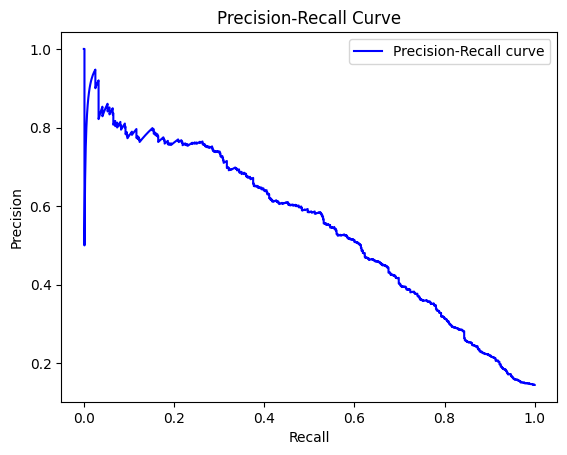

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

bert_model.eval()
y_probs, y_true = [], []
with torch.no_grad():
    for batch in val_dataloader:
        inputs = {
            'input_ids': batch['input_ids'].to(device),
            'attention_mask': batch['attention_mask'].to(device),
            'labels': batch['labels'].to(device),
        }
        outputs = bert_model(**inputs)
        val_loss += outputs.loss.item()

        logits = outputs.logits
        preds = torch.sigmoid(logits).cpu().numpy()
        y_probs.extend(preds)
        y_true.extend(inputs['labels'].cpu().numpy())

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_true, y_probs)

# Plot precision-recall curve
plt.plot(recall, precision, color='b', label="Precision-Recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="best")
plt.show()

# Compute F1 scores 
f1_scores = 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1])


### Checking the performance with different threshold values

In [ ]:
test_dataset = TextDataset(test_df, tokenizer, max_length=128)
test_dataloader = DataLoader(test_dataset, batch_size=16)
bert_model.eval()
y_preds, y_true = [], []
with torch.no_grad():
        for batch in test_dataloader:
            inputs = {
                'input_ids': batch['input_ids'].to(device),
                'attention_mask': batch['attention_mask'].to(device),
                'labels': batch['labels'].to(device),
            }
            outputs = bert_model(**inputs)

            logits = outputs.logits
            preds = torch.sigmoid(logits).cpu().numpy() > 0.55 # testing threshold = 0.65 for now
            y_preds.extend(preds)
            y_true.extend(inputs['labels'].cpu().numpy())

In [ ]:
print(classification_report(y_true, y_preds))

              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93      4158
         1.0       0.64      0.42      0.51       694

    accuracy                           0.88      4852
   macro avg       0.77      0.69      0.72      4852
weighted avg       0.87      0.88      0.87      4852



Weighted XLNet

In [ ]:
# %pip install transformers torch

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Ensemble Bert
add a scheduler

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np

# Define the number of models in the ensemble
ensemble_size = 5

# Tokenizer and dataset preparation
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

class TextDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_length):
        self.dataframe = dataframe
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, index):
        row = self.dataframe.iloc[index]
        inputs = self.tokenizer.encode_plus(
            row['content'],  # Replace 'content' with 'article_content' if working with real data
            None,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt',
        )
        return {
            'input_ids': inputs['input_ids'].squeeze(0),
            'attention_mask': inputs['attention_mask'].squeeze(0),
            'labels': torch.tensor(row['relevant'], dtype=torch.float),
        }

# Load dataset
train_dataset = TextDataset(train_df, tokenizer, max_length=128)
val_dataset = TextDataset(val_df, tokenizer, max_length=128)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(train_df['relevant']), y=train_df['relevant'])
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float32).to(device)

# Split the dataset into subsets for each model

# subset_datasets = []
# subset_sizes = len(train_dataset) // ensemble_size

# for i in range(ensemble_size):
#     start_idx = i * subset_sizes
#     end_idx = (i + 1) * subset_sizes if i < ensemble_size - 1 else len(train_dataset)
    
#     subset = torch.utils.data.Subset(train_dataset, range(start_idx, end_idx))
#     subset_datasets.append(subset)

splitter = StratifiedShuffleSplit(n_splits=ensemble_size, test_size=None, random_state=42)

# List to hold the subsets for each model
subset_datasets = []

# Perform stratified splitting
for train_idx, _ in splitter.split(train_df, train_df['relevant']):
    subset = torch.utils.data.Subset(train_dataset, train_idx)
    subset_datasets.append(subset)

# Initialize multiple BERT models for the ensemble
ensemble_models = []
for i in range(ensemble_size):
    bert_model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=1)
    bert_model.to(device)
    ensemble_models.append(bert_model)

# Optimizer for the ensemble models
optimizer = AdamW([param for model in ensemble_models for param in model.parameters()], lr=2e-5)

# Loss function
loss_fn = torch.nn.BCEWithLogitsLoss(pos_weight=class_weights_tensor)

# Validation DataLoader
val_dataloader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# Training loop
num_epochs = 20
current_epoch = 0
best_val_loss = float('inf')

for epoch in range(current_epoch, num_epochs):
    print(f"Epoch {epoch}/{num_epochs}")
    
    # Train each model in the ensemble on a different subset of the data
    for i, model in enumerate(ensemble_models):
        model.train()
        train_subset_dataloader = DataLoader(subset_datasets[i], batch_size=16, shuffle=True)
        train_loss = 0
        for batch_idx, batch in enumerate(train_subset_dataloader):
            optimizer.zero_grad()

            # Train each model on its own subset
            inputs = {
                'input_ids': batch['input_ids'].to(device),
                'attention_mask': batch['attention_mask'].to(device),
                'labels': batch['labels'].to(device),
            }

            outputs = model(**inputs)
            loss = outputs.loss
            train_loss += loss.item()

            loss.backward()
            optimizer.step()

            if (batch_idx + 1) % 10 == 0 or batch_idx == len(train_subset_dataloader) - 1:
                print(f"  Batch {batch_idx + 1}/{len(train_subset_dataloader)} - Loss: {loss.item():.4f}")

        train_loss /= len(train_subset_dataloader)
        print(f"Training Loss for model {i + 1}: {train_loss:.4f}")

    # Validation
    val_loss = 0
    val_preds, val_labels = [], []
    with torch.no_grad():
        for batch in val_dataloader:
            batch_preds = []
            inputs = {
                'input_ids': batch['input_ids'].to(device),
                'attention_mask': batch['attention_mask'].to(device),
                'labels': batch['labels'].to(device),
            }
            for model in ensemble_models:
                outputs = model(**inputs)
                logits = outputs.logits
                batch_preds.append(torch.sigmoid(logits).cpu().numpy())

            # Average the predictions from all models
            batch_preds = torch.stack([torch.tensor(pred) for pred in batch_preds])
            avg_preds = torch.mean(batch_preds, dim=0)
            preds = (avg_preds.squeeze() > 0.5).numpy()  # threshold

            val_preds.extend(preds)
            val_labels.extend(inputs['labels'].cpu().numpy())

            # Calculate validation loss for each batch and accumulate it
            batch_loss = 0
            for model in ensemble_models:
                outputs = model(**inputs)
                batch_loss += loss_fn(outputs.logits, inputs['labels'])
            batch_loss /= len(ensemble_models)  # Average the loss
            val_loss += batch_loss.item()

    # Calculate validation loss and metrics
    val_loss /= len(val_dataloader)
    print(f"Validation Loss: {val_loss:.4f}")
    print(classification_report(val_labels, val_preds))

    # Save the best model based on validation loss
    if val_loss < best_val_loss:
        print(f"Validation loss improved. Saving model.")
        best_val_loss = val_loss
        torch.save({
            'epoch': epoch,
            'model_state_dict': [model.state_dict() for model in ensemble_models],
            'optimizer_state_dict': optimizer.state_dict(),
            'best_val_loss': best_val_loss
        }, f"best_ensemble_model_epoch_{epoch}_BCEWithLogitsLoss.pt")

print("Training complete!")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are

Epoch 0/20
  Batch 10/819 - Loss: 0.1362
  Batch 20/819 - Loss: 0.0845
  Batch 30/819 - Loss: 0.0592
  Batch 40/819 - Loss: 0.0715
  Batch 50/819 - Loss: 0.2071
  Batch 60/819 - Loss: 0.1036
  Batch 70/819 - Loss: 0.1277
  Batch 80/819 - Loss: 0.0911
  Batch 90/819 - Loss: 0.1165
  Batch 100/819 - Loss: 0.1842
  Batch 110/819 - Loss: 0.0982
  Batch 120/819 - Loss: 0.1139
  Batch 130/819 - Loss: 0.1173
  Batch 140/819 - Loss: 0.0763
  Batch 150/819 - Loss: 0.0658
  Batch 160/819 - Loss: 0.1407
  Batch 170/819 - Loss: 0.0840
  Batch 180/819 - Loss: 0.1104
  Batch 190/819 - Loss: 0.1104
  Batch 200/819 - Loss: 0.0875
  Batch 210/819 - Loss: 0.0400
  Batch 220/819 - Loss: 0.0503
  Batch 230/819 - Loss: 0.1097
  Batch 240/819 - Loss: 0.1908
  Batch 250/819 - Loss: 0.0308
  Batch 260/819 - Loss: 0.1012
  Batch 270/819 - Loss: 0.1203
  Batch 280/819 - Loss: 0.1105
  Batch 290/819 - Loss: 0.1238


KeyboardInterrupt: 